![image info](https://ineuron.ai/images/ineuron-logo.png)

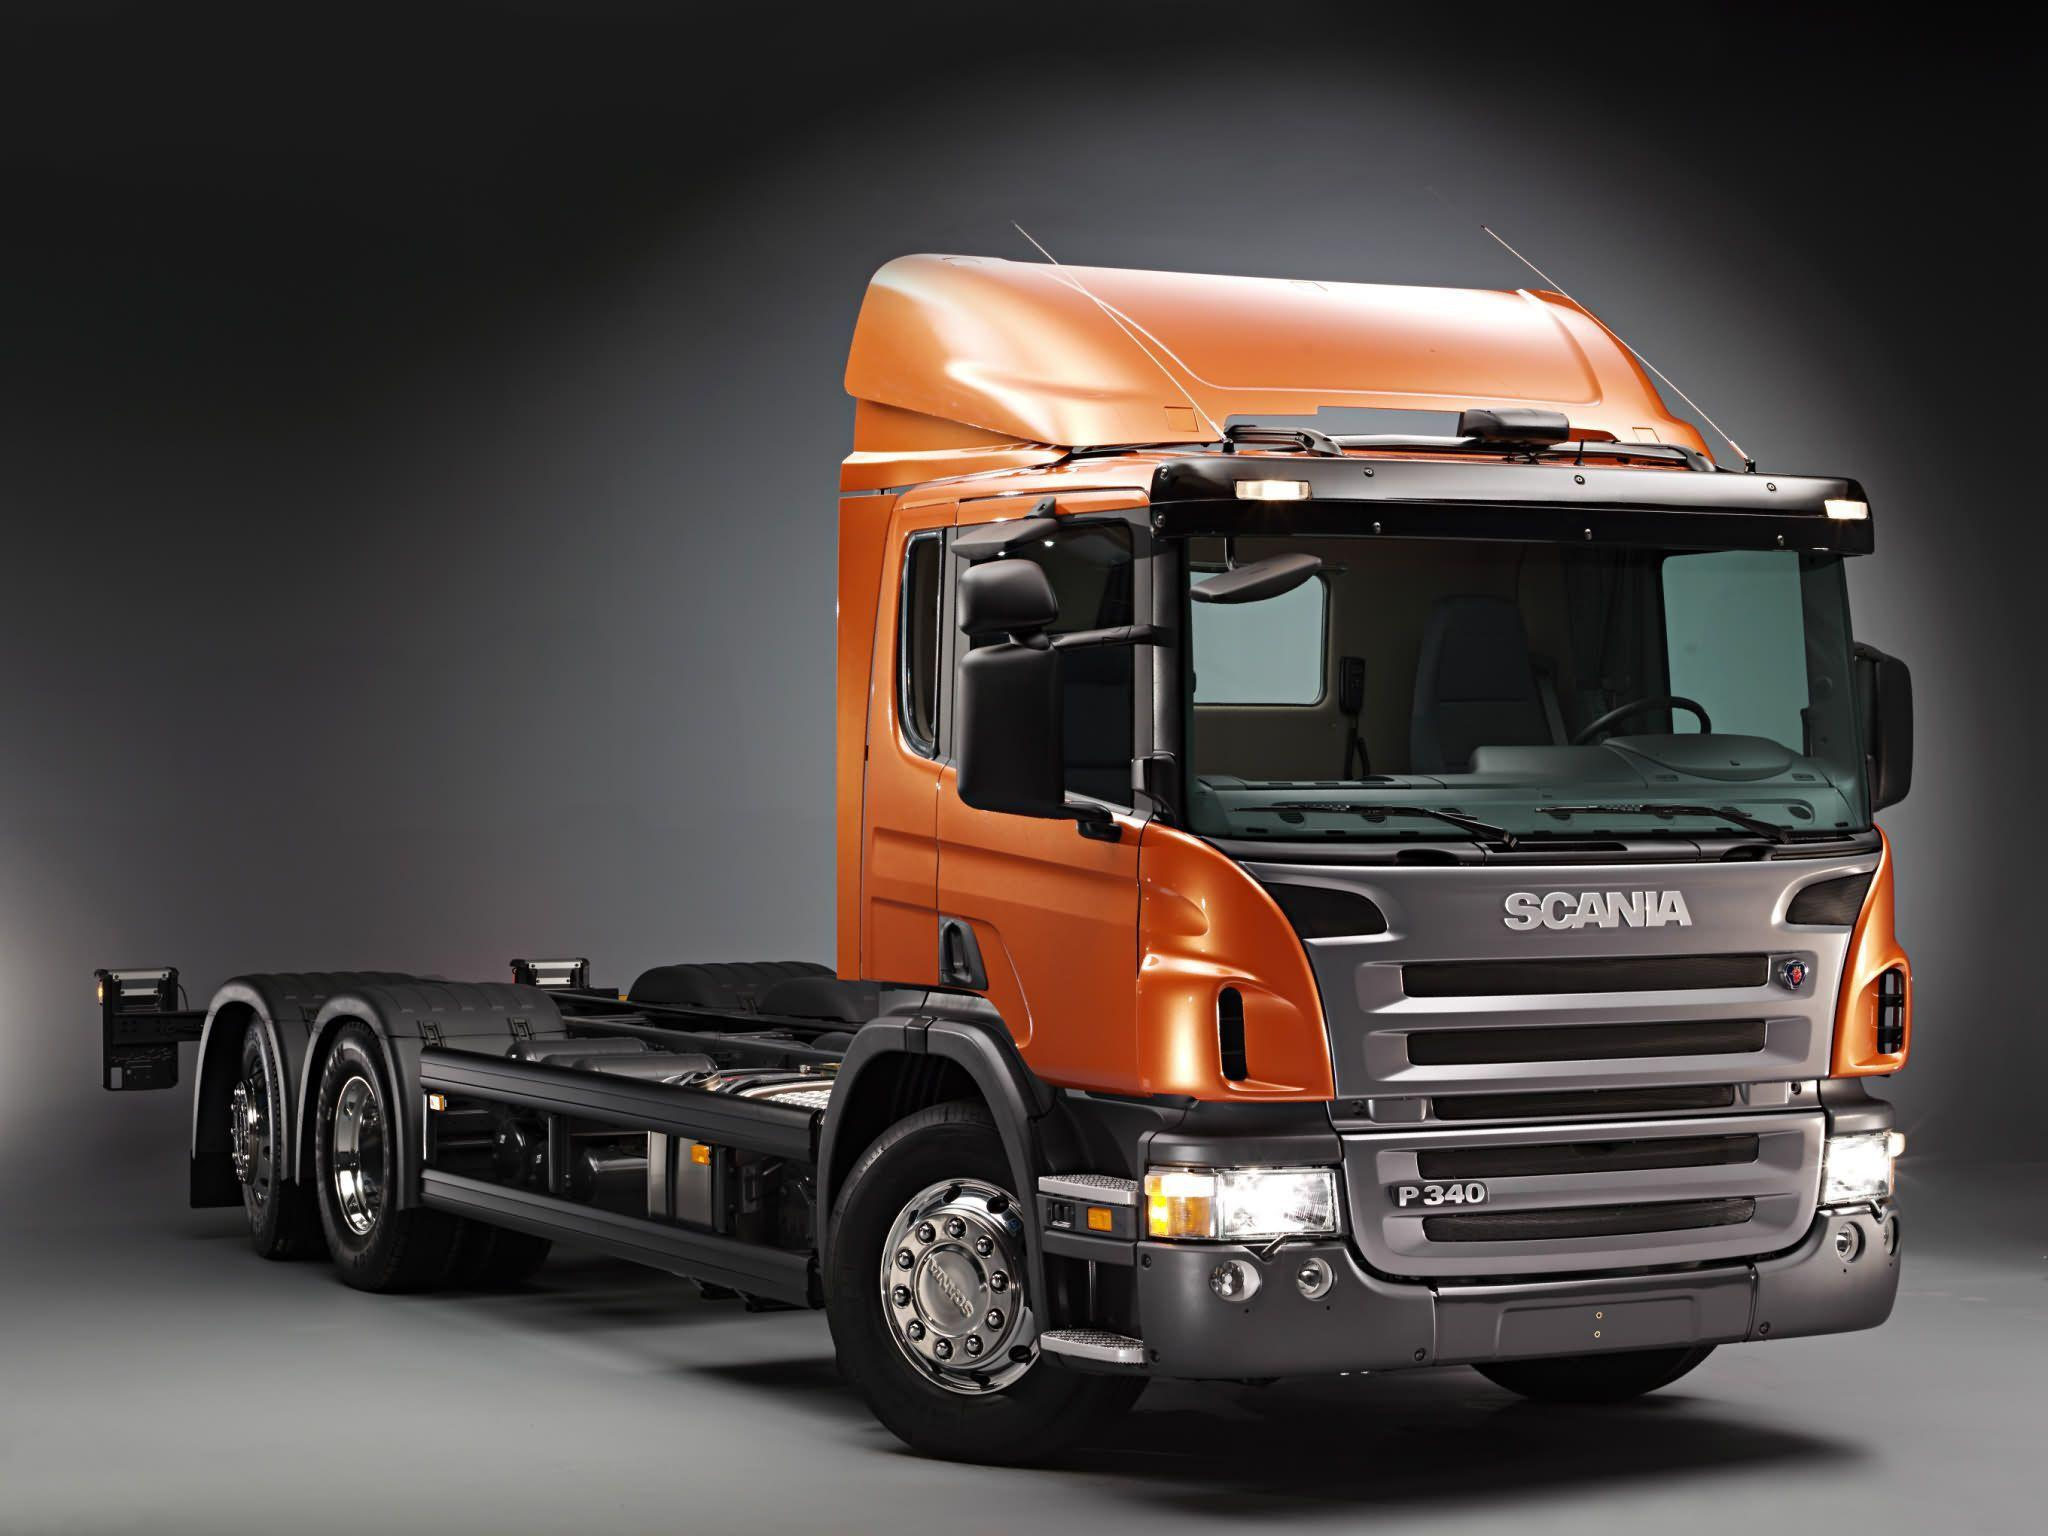

<span style="color:#800080 ;font-size:25px"> <font face="forte"><b> ......................................................................  By Mr Jecky Master

<span style="color:#008000;font-size:20px"> =><font face="Times New Roman"> <b><u>Importing all the libraries.

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
import warnings
warnings.filterwarnings("ignore")ada_model = AdaBoostClassifier()

<span style="color:#dc143c;font-size:30px"> =><font face="Times New Roman"><b><u> Introduction of APS Failure Scania Trucks dataset

<span style="color:#0000ff;font-size:20px"> =><font face="Serif">The dataset consists of data collected from heavy Scania trucks in everyday usage. The system in focus is the <b>Air Pressure system (APS)</b> which generates pressurised air that are utilized in various functions in a truck, such as braking and gear changes. The datasets' positive class consists of component failures for a specific component of the APS system. The negative class consists of trucks with failures for components not related to the APS.

In [58]:
data = pd.read_csv('aps_failure_training_set.csv', header=None)

In [59]:
# data.head(20)

In [60]:
data = data.drop(data.index[0:20])

In [61]:
data.head(20)

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
20,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
21,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
22,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
23,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
24,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
25,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
26,neg,38312,na,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
27,neg,14,0,6,na,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
28,neg,102960,na,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
29,neg,78696,na,0,na,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0


In [62]:
data.columns=data.iloc[0]

In [63]:
data.head()

20,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
20,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
21,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
22,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
23,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
24,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32


In [64]:
data = data.drop(data.index[0])

In [65]:
data.head()

20,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
21,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
22,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
23,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
24,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
25,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [66]:
data.drop_duplicates()

20,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
21,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
22,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
23,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
24,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
25,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60016,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
60017,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
60018,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
60019,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [67]:
data.head()

20,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
21,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
22,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
23,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
24,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
25,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


<span style="color:#008000;font-size:20px"> =><font face="Times New Roman">There are no duplicates in the dataset

In [68]:
data1=data

In [69]:
data1 = data1.reset_index(drop=True)

In [70]:
data = data1

<span style="color:#a52a2a ;font-size:20px"> =><font face="Verdana"><b> Data Cleaning

In [71]:
data.head()

20,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [72]:
data.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', name=20, length=171)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: object(171)
memory usage: 78.3+ MB


In [74]:
data['class'].unique()

array(['neg', 'pos'], dtype=object)

* **There are two outputs only therefore it is the case of classification problem**

In [75]:
data.isnull().sum()

20
class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [76]:
data.dtypes

20
class     object
aa_000    object
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [77]:
data.select_dtypes(exclude = 'object')

20
0
1
2
3
4
...
59995
59996
59997
59998


<span style="color:#00008b;font-size:20px"> =><font face="Times New Roman">It shows there is not such column which having data type of integers. Need to change data type to integers

In [78]:
#data['ab_000']=data['ab_000'].astype(int)

In [79]:
data['ab_000']=='na'

0         True
1         True
2         True
3        False
4         True
         ...  
59995     True
59996     True
59997    False
59998     True
59999     True
Name: ab_000, Length: 60000, dtype: bool

In [80]:
data = data.replace('na', np.nan)

In [81]:
data.head(20)

20,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,NaN,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,0,6,NaN,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,NaN,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,NaN,0,NaN,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,0,182,NaN,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0


In [82]:
data.isnull().sum()

20
class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

* **So now it can be seen that there are numbers of Null values in the dataframe.**

In [83]:
data_column = data.columns
data_column

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', name=20, length=171)

* **Handling the null values with the help of forward fill and back ward fill methods**

In [84]:
for col in data_column[1:]:
    data[col]=data[col].replace(np.nan,0)

In [85]:
data.head()

20,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,0,0,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,0,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,0,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [86]:
data.isnull().sum()

20
class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

* **So there is no null values in the dataframe**

* **lets convert the data types from 'Object' to 'integer' and 'float'.**

In [87]:
for col in data_column:
    if col == 'class':
        pass
    else:
        data[col]=data[col].astype(float)

In [88]:
for col in data_column:
    if col == 'class':
        pass
    else:
        data[col]=data[col].astype('int64')

In [89]:
data.dtypes

20
class     object
aa_000     int64
ab_000     int64
ac_000     int64
ad_000     int64
           ...  
ee_007     int64
ee_008     int64
ee_009     int64
ef_000     int64
eg_000     int64
Length: 171, dtype: object

In [90]:
data.describe()

20,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,0.162500,3.362258e+08,1.434071e+05,6.535000,10.548200,2.191577e+02,9.648104e+02,8.509771e+03,8.760054e+04,...,4.405077e+05,2.087653e+05,4.407495e+05,3.895406e+05,3.293335e+05,3.423990e+05,1.371785e+05,8.295099e+03,0.086467,0.203100
std,1.454301e+05,1.687318,7.767625e+08,3.504525e+07,158.147893,205.387115,2.036364e+04,3.400891e+04,1.494818e+05,7.575171e+05,...,1.150015e+06,5.407282e+05,1.162708e+06,1.115528e+06,1.063741e+06,1.718752e+06,4.472274e+05,4.721249e+04,4.268570,8.628043
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,8.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.662000e+03,1.024000e+03,2.288000e+03,2.897000e+03,3.960000e+02,8.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.200000e+02,4.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.280220e+05,1.088190e+05,2.153240e+05,1.838280e+05,8.491400e+04,3.840600e+04,3.276000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,8.480000e+02,2.920000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.350315e+05,2.164440e+05,4.624655e+05,4.003010e+05,2.725220e+05,1.663465e+05,1.367255e+05,1.934000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [91]:
data.to_csv("APS_failure_Scania_updated.csv", index=False)

In [92]:
data = pd.read_csv("APS_failure_Scania_updated.csv")

In [93]:
data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,0,0,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,0,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,0,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,0,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,0,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,0,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


<span style="color:#008000;font-size:20px"> =><font face="Times New Roman">  <b>Memory usage of each columns

In [94]:
data.memory_usage()

Index        128
class     480000
aa_000    480000
ab_000    480000
ac_000    480000
           ...  
ee_007    480000
ee_008    480000
ee_009    480000
ef_000    480000
eg_000    480000
Length: 172, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

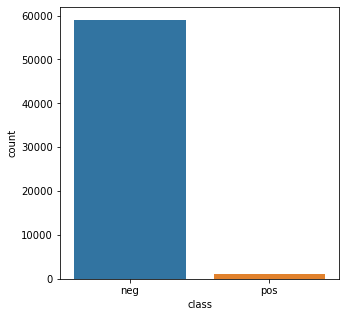

In [95]:
plt.figure(figsize=(5, 5))
sns.countplot(x=data['class'])

* **As it can be seen that very few positives are there**

<AxesSubplot:xlabel='20', ylabel='20'>

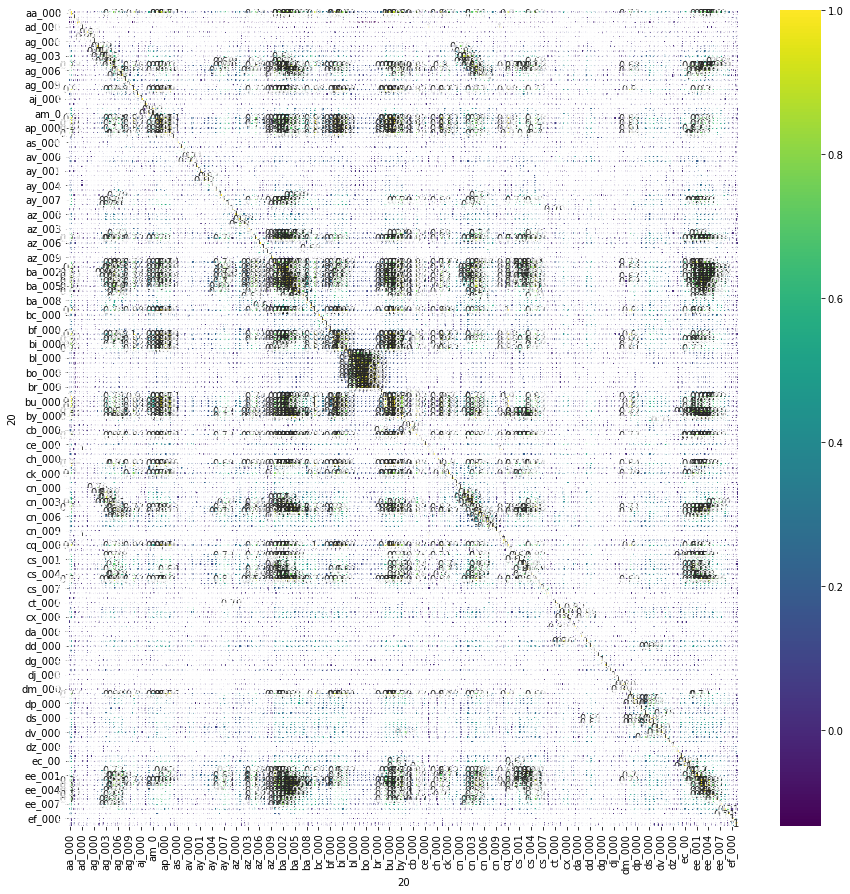

In [81]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),cmap = 'viridis',linewidths=0.5, annot= True)

In [96]:
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA

In [97]:
y = data['class']
x = data.drop('class', axis=1)

In [98]:
pca = PCA(n_components = 5)
pca.fit(x)
data_pca = pca.transform(x)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5'])
data_pca

,PC1,PC2,PC3,PC4,PC5
0,1.794496e+09,3.211523e+05,-13914.100932,3.221798e+06,1.246086e+07
1,-3.361937e+08,-5.375804e+06,-284084.983415,-6.810371e+06,-1.193847e+05
2,-3.361927e+08,-5.608250e+06,-277150.003652,-1.020018e+07,-1.375904e+06
3,-3.361710e+08,-6.252036e+06,-263685.285572,-1.471480e+07,-8.833286e+06
4,-3.362444e+08,-4.891118e+06,-310272.149088,1.014545e+07,-5.099864e+06
...,...,...,...,...,...
59995,-3.364199e+08,-2.457138e+06,-415694.435132,7.192584e+07,-1.089942e+07
59996,1.794511e+09,-1.373746e+06,20155.983755,-7.800156e+06,-6.727554e+06
59997,1.794512e+09,-1.429219e+06,22479.383013,-9.193486e+06,-6.593671e+06
59998,1.794448e+09,9.781449e+05,-63584.040441,3.726327e+07,-3.386379e+06


<span style="color:#0000ff;font-size:20px"> =><font face="Verdana"><b>Getting the traning and test data

In [99]:
x_train, x_test, y_train, y_test = train_test_split(data_pca, y, test_size=0.33, random_state=30)

In [100]:
x_train

,PC1,PC2,PC3,PC4,PC5
9567,-3.361711e+08,-6.252874e+06,-263701.145573,-1.471407e+07,-8.829998e+06
58473,-3.361864e+08,-5.318960e+06,-283051.181310,-8.439531e+06,2.151669e+06
10175,-3.361715e+08,-6.254555e+06,-263805.989289,-1.471714e+07,-8.838974e+06
48088,-3.361858e+08,-5.837176e+06,-271311.007405,-1.242323e+07,-3.645228e+06
8847,1.794512e+09,-1.435025e+06,22521.699410,-9.199432e+06,-6.607794e+06
...,...,...,...,...,...
33268,-3.361711e+08,-6.248183e+06,-263779.949974,-1.469553e+07,-8.792502e+06
44845,-3.362451e+08,-5.230466e+06,-310485.796531,1.354037e+07,-1.324324e+07
48045,-3.362017e+08,-5.356053e+06,-281359.381774,-8.580454e+06,1.646221e+06
4517,-3.361749e+08,-6.200549e+06,-266116.384370,-1.327598e+07,-9.049021e+06


In [101]:
y_train

9567     neg
58473    neg
10175    neg
48088    neg
8847     neg
        ... 
33268    neg
44845    neg
48045    neg
4517     neg
38693    neg
Name: class, Length: 40200, dtype: object

<span style="color:#0000ff;font-size:20px"> =><font face="Verdana"><b>Training the model by SVM (SVC)

In [103]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_tf = scaler.transform(x_train)
x_test_tf = scaler.transform(x_test)
model=SVC()
model.fit(x_train_tf,y_train)
model.score(x_train_tf,y_train)
y_predict = model.predict(x_test_tf)
accuracy_SVC_PCM = accuracy_score(y_test, y_predict)
print('Accuracy score =', round(accuracy_SVC_PCM*100, 2), '%')

Accuracy score = 98.46 %


 * **The above accuracy is getting after doing PCM**

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=30)

In [105]:
x_train

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
9567,4,0,44,38,0,0,0,0,0,0,...,184,50,54,52,70,82,0,0,0,0
58473,40944,0,0,0,0,0,0,0,0,0,...,473360,107284,128716,76582,68486,63810,374796,94812,0,0
10175,4,0,0,0,0,0,0,0,0,0,...,114,10,20,26,32,38,0,0,0,0
48088,24138,0,0,0,0,0,0,0,1214,164512,...,258768,104388,214442,279468,214140,32400,1494,0,0,0
8847,32,0,2130706446,52,0,0,0,0,0,0,...,266,130,194,206,128,112,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33268,96,0,14,12,0,0,0,0,0,0,...,520,128,240,650,1910,270,0,0,0,0
44845,28622,0,888,754,0,0,0,0,0,0,...,214510,90944,176848,153210,165848,134854,252888,20476,0,0
48045,40372,0,1358,1244,0,0,0,0,0,8042,...,448346,190926,322502,259764,202694,127854,219262,12686,0,0
4517,2404,0,26,26,0,0,0,0,0,0,...,6060,3728,13010,87436,414,2,0,0,0,0


In [106]:
y_train

9567     neg
58473    neg
10175    neg
48088    neg
8847     neg
        ... 
33268    neg
44845    neg
48045    neg
4517     neg
38693    neg
Name: class, Length: 40200, dtype: object

In [107]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_tf = scaler.transform(x_train)
x_test_tf = scaler.transform(x_test)
model=SVC()
model.fit(x_train_tf,y_train)
model.score(x_train_tf,y_train)
y_predict = model.predict(x_test_tf)
accuracy = accuracy_score(y_test, y_predict)

In [108]:
print(accuracy)
print('Accuracy score =', round(accuracy*100, 2), '%')

0.9872222222222222
Accuracy score = 98.72 %


* **There is not much differece in the both accuracies**

<span style="color:#0000ff;font-size:20px"> =><font face="Verdana"><b> 1. Training the model using Logistic Regression

In [110]:
model_log = LogisticRegression()
model_log.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_log = accuracy_score(y_test, y_predict)
print(accuracy_log)
print('Accuracy score =', round(accuracy_log*100, 2), '%')

0.9833333333333333
Accuracy score = 98.33 %


<span style="color:#0000ff;font-size:20px"> =><font face="Verdana"><b>Confusion Matrix

In [111]:
conf_mat = confusion_matrix(y_test,y_predict)
conf_mat

array([[19470,     0],
       [  330,     0]], dtype=int64)

In [113]:
TP = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TN = conf_mat[1][1]

In [114]:
Accuracy_cof_mat = (TP + TN) / (TP + FP + FN + TN)
Accuracy_cof_mat

0.9833333333333333

In [115]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

         neg       1.00      0.98      0.99     19800
         pos       0.00      0.00      0.00         0

    accuracy                           0.98     19800
   macro avg       0.50      0.49      0.50     19800
weighted avg       1.00      0.98      0.99     19800



<span style="color:#800080 ;font-size:20px"> =><font face="Verdana"><b> ROC AUC Curve

In [ ]:
#auc = roc_auc_score(y_test, y_predict)
#auc

<span style="color:#800080 ;font-size:20px"> =><font face="Verdana"><b> 2. Decision tree

In [116]:
model_dec_tree = DecisionTreeClassifier()
model_dec_tree.fit(x_train,y_train)
y_predict_dec_tree = model_dec_tree.predict(x_test)
accuracy_dec_tree = accuracy_score(y_test, y_predict_dec_tree)
print(accuracy_dec_tree)
print('Accuracy score =', round(accuracy_dec_tree*100, 2), '%')

0.9901515151515151
Accuracy score = 99.02 %


[Text(0.7596014384186445, 0.9852941176470589, 'X[70] <= 3812999.0\ngini = 0.033\nsamples = 40200\nvalue = [39530, 670]'),
 Text(0.6090633587153779, 0.9558823529411765, 'X[8] <= 143370.0\ngini = 0.011\nsamples = 39105\nvalue = [38897, 208]'),
 Text(0.5468104756840764, 0.9264705882352942, 'X[84] <= 233831.0\ngini = 0.007\nsamples = 38985\nvalue = [38841, 144]'),
 Text(0.49347439660664644, 0.8970588235294118, 'X[8] <= 45414.0\ngini = 0.005\nsamples = 38887\nvalue = [38782, 105]'),
 Text(0.4645617112689199, 0.8676470588235294, 'X[94] <= 48001864.0\ngini = 0.004\nsamples = 38760\nvalue = [38677, 83]'),
 Text(0.4436391412524454, 0.8382352941176471, 'X[32] <= 2223429.0\ngini = 0.004\nsamples = 38751\nvalue = [38673, 78]'),
 Text(0.4281531445473383, 0.8088235294117647, 'X[135] <= 733577.0\ngini = 0.004\nsamples = 38738\nvalue = [38666, 72]'),
 Text(0.4129966371338293, 0.7794117647058824, 'X[46] <= 29391533.0\ngini = 0.004\nsamples = 38728\nvalue = [38660, 68]'),
 Text(0.39849910830351626, 0.75

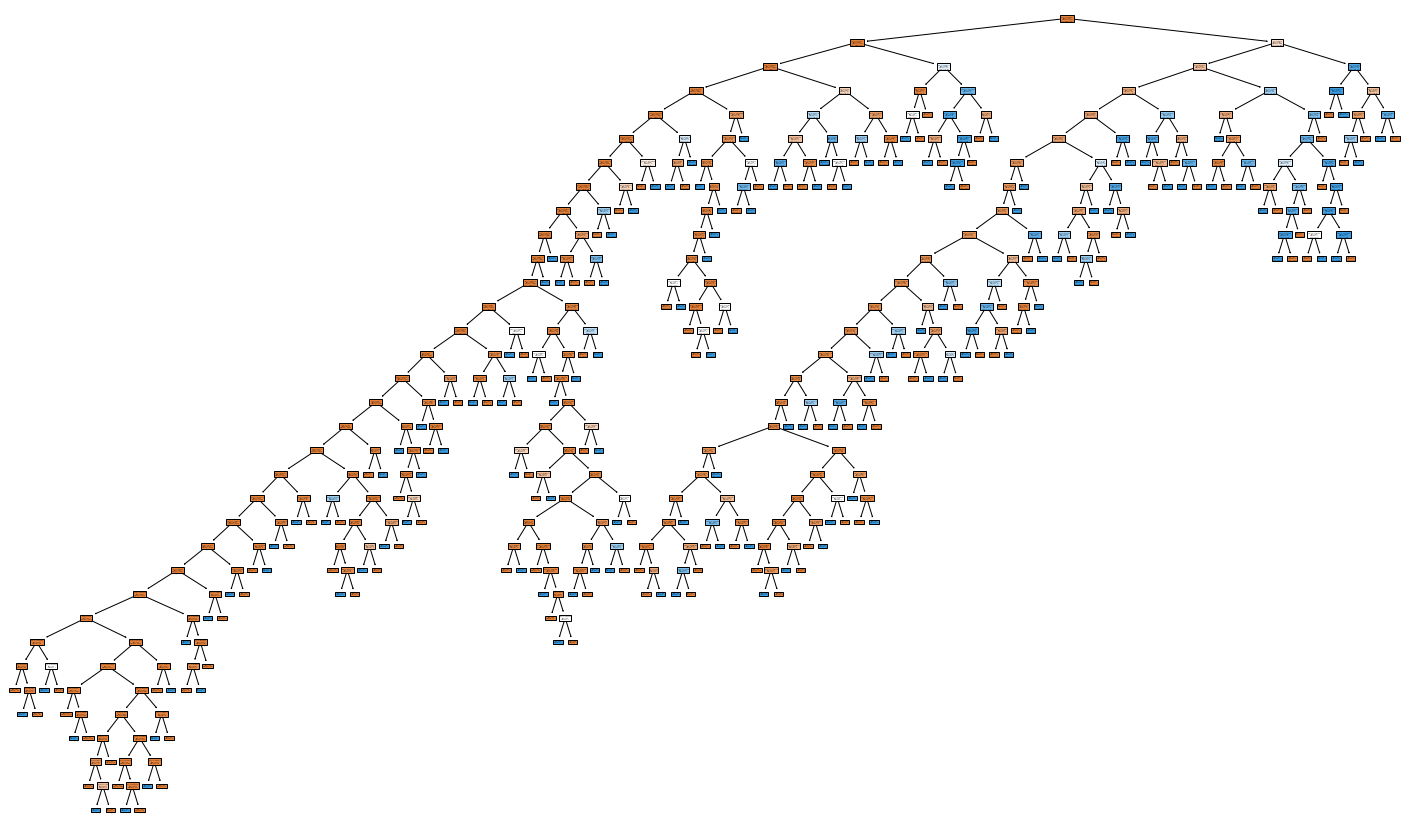

In [117]:
from sklearn import tree
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_dec_tree,filled=True)

In [118]:
fig.savefig("decision Tree Scania Truck.png")

<span style="color:#800080 ;font-size:20px"> =><font face="Verdana"><b> Decision tree with best hyperparameters

In [127]:
model_dec_tree_with_best_fit = DecisionTreeClassifier(criterion = 'gini',  max_depth= 5,  min_samples_leaf= 4,  min_samples_split= 4, splitter= 'random')
model_dec_tree_with_best_fit.fit(x_train, y_train)
y_pred_dec_tree_with_best_fit = model_dec_tree_with_best_fit.predict(x_test)
accuracy_dec_tree_with_best_fit = accuracy_score(y_test, y_pred_dec_tree_with_best_fit)
print(accuracy_dec_tree_with_best_fit)
print('Accuracy score =', round(accuracy_dec_tree_with_best_fit*100, 2), '%')

0.987979797979798
Accuracy score = 98.8 %


[Text(0.6317567567567568, 0.9166666666666666, 'X[142] <= 329237.775\ngini = 0.033\nsamples = 40200\nvalue = [39530, 670]'),
 Text(0.3918918918918919, 0.75, 'X[100] <= 1379328.78\ngini = 0.017\nsamples = 39415\nvalue = [39086, 329]'),
 Text(0.21621621621621623, 0.5833333333333334, 'X[8] <= 50576.527\ngini = 0.013\nsamples = 39337\nvalue = [39072, 265]'),
 Text(0.10810810810810811, 0.4166666666666667, 'X[94] <= 34608535.972\ngini = 0.008\nsamples = 39061\nvalue = [38903, 158]'),
 Text(0.05405405405405406, 0.25, 'X[142] <= 194901.802\ngini = 0.006\nsamples = 38908\nvalue = [38797, 111]'),
 Text(0.02702702702702703, 0.08333333333333333, 'gini = 0.004\nsamples = 38584\nvalue = [38511, 73]'),
 Text(0.08108108108108109, 0.08333333333333333, 'gini = 0.207\nsamples = 324\nvalue = [286, 38]'),
 Text(0.16216216216216217, 0.25, 'X[103] <= 22377777.018\ngini = 0.426\nsamples = 153\nvalue = [106, 47]'),
 Text(0.13513513513513514, 0.08333333333333333, 'gini = 0.328\nsamples = 121\nvalue = [96, 25]'),

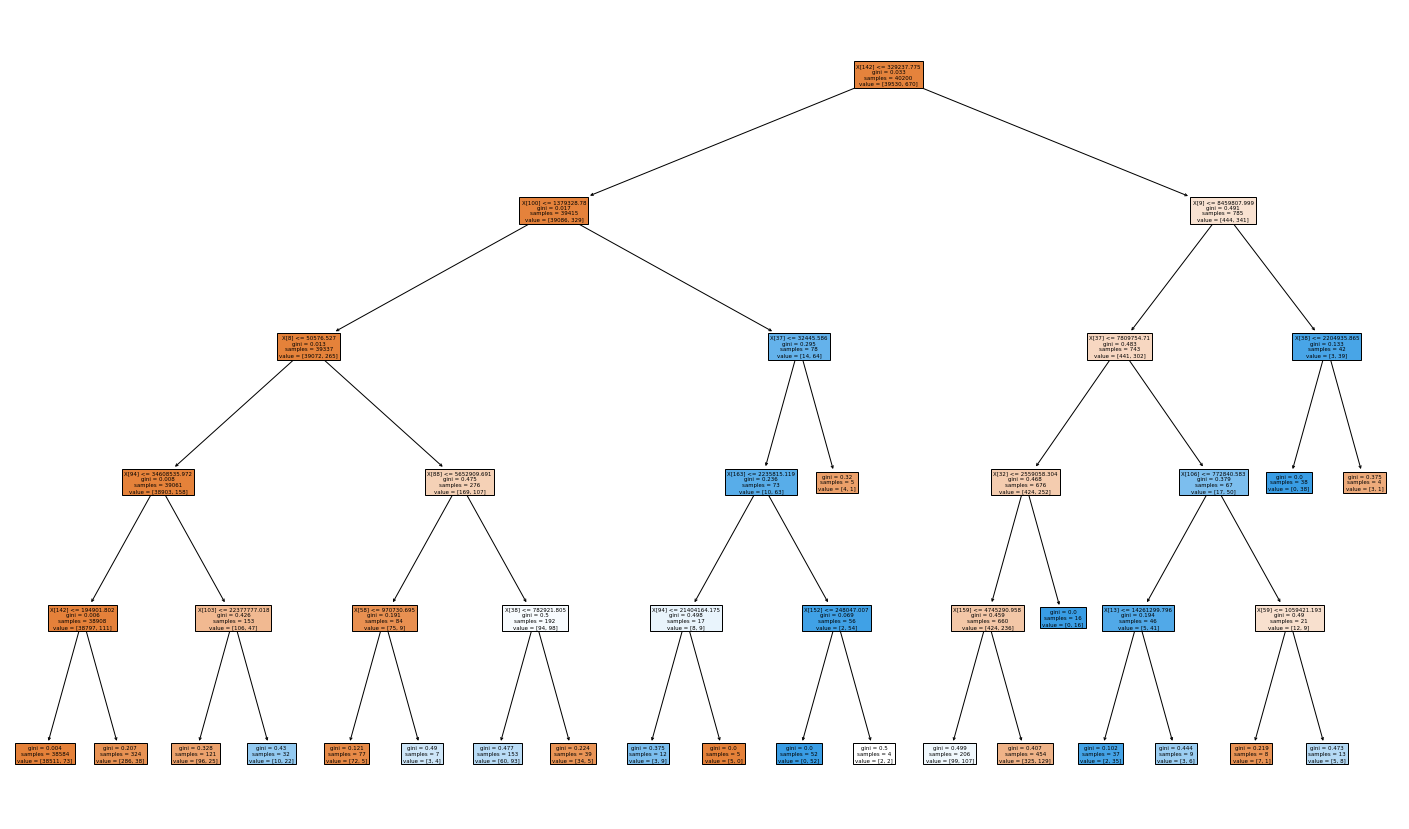

In [128]:
from sklearn import tree
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_dec_tree_with_best_fit,filled=True)

In [129]:
fig.savefig("decision Tree Scania Truck with best fit.png")

<span style="color:#800080 ;font-size:20px"> =><font face="Verdana"><b> 3. Random Forest

In [132]:
Rf_model=RandomForestClassifier()
Rf_model.fit(x_train,y_train)
y_pred_rf=Rf_model.predict(x_test)
accuracy_score_rf=accuracy_score(y_test,y_pred_rf)
print(accuracy_score_rf)
print('Accuracy score =', round(accuracy_score_rf*100, 2), '%')

0.9938888888888889
Accuracy score = 99.39 %


<span style="color:#800080 ;font-size:20px"> =><font face="Verdana"><b> Random Forest with best hyper parameters 

In [134]:
Rf_model_WBP=RandomForestClassifier(criterion='gini',max_depth= 14,max_features= 'log2',min_samples_leaf= 1,min_samples_split= 2,n_estimators=115)
Rf_model_WBP.fit(x_train,y_train)
y_pred_rf_WBP=Rf_model_WBP.predict(x_test)
accuracy_score_rf_WBP=accuracy_score(y_test,y_pred_rf_WBP)
print(accuracy_score_rf_WBP)
print('Accuracy score =', round(accuracy_score_rf_WBP*100, 2), '%')

0.9926767676767677
Accuracy score = 99.27 %


<span style="color:#32cd32 ;font-size:20px"> =><font face="Verdana"><b> 4. Bagging Classifier

In [138]:
model_bagging_svc = BaggingClassifier(base_estimator=SVC(),n_estimators=50, random_state=0)
model_bagging_svc.fit(x_train,y_train)
y_predict_bagging = model_bagging_svc.predict(x_test)
accuracy_score_bagging = accuracy_score(y_test,y_predict_bagging)
print(accuracy_score_bagging)
print('Accuracy score =', round(accuracy_score_bagging*100, 2), '%')

0.9836363636363636
Accuracy score = 98.36 %


<span style="color:#ff1493;font-size:20px"> =><font face="Verdana"><b> 5. Adaboost

In [141]:
ada_model = AdaBoostClassifier()
ada_model.fit(x_train,y_train)
y_pred_ada=ada_model.predict(x_test)
accuracy_score_ada = accuracy_score(y_test,y_pred_ada)
print(accuracy_score_ada)
print('Accuracy score =', round(accuracy_score_ada*100, 2), '%')

0.9910606060606061
Accuracy score = 99.11 %


<span style="color:#ff1493;font-size:20px"> =><font face="Verdana"><b> Adaboost with best hyperparameters

In [142]:
ada_model_with_best_params=AdaBoostClassifier(learning_rate= 0.003, n_estimators= 180)
ada_model_with_best_params.fit(x_train,y_train)
y_predict_ada_bp = ada_model_with_best_params.predict(x_test)
accuracy_score_ada_with_best_params = accuracy_score(y_test,y_predict_ada_bp)
print(accuracy_score_ada_with_best_params)
print('Accuracy score =', round(accuracy_score_ada_with_best_params*100, 2), '%')

0.9833333333333333
Accuracy score = 98.33 %


<span style="color:#ff4500;font-size:20px"> =><font face="Verdana"><b> 6. Gradian Boost

In [143]:
gradBoost_model = GradientBoostingClassifier()
gradBoost_model.fit(x_train,y_train)
y_predict_gradBoost = gradBoost_model.predict(x_test)
accuracy_score_gradboost = accuracy_score(y_test,y_predict_gradBoost)
print(accuracy_score_gradboost)
print('Accuracy score =', round(accuracy_score_gradboost*100, 2), '%')

0.9922727272727273
Accuracy score = 99.23 %


<span style="color:#9b111e ;font-size:20px"> =><font face="Verdana"><b> 7. XG Boost

In [144]:
model_xgb=xgboost.XGBClassifier()
model_xgb.fit(x_train,y_train)
y_pred_xgb=model_xgb.predict(x_test)
accuracy_score_xgb = accuracy_score(y_test,y_pred_xgb)
print(accuracy_score_xgb)
print('Accuracy score =', round(accuracy_score_xgb*100, 2), '%')

0.9936363636363637
Accuracy score = 99.36 %


In [150]:
print('1. Logistic Regression'+'=>'+ 'Accuracy score =', round(accuracy_log*100, 2), '%')
print('2. Decision tree'+'=>'+ 'Accuracy score       =', round(accuracy_dec_tree*100, 2), '%')
print('3. Random Forest'+'=>'+ 'Accuracy score       =', round(accuracy_score_rf*100, 2), '%')
print('4. Bagging Classifier'+'=>'+ 'Accuracy score  =', round(accuracy_score_bagging*100, 2), '%')
print('5. Adaboost'+'=>'+ 'Accuracy score            =', round(accuracy_score_ada*100, 2), '%')
print('6. Gradian Boost'+'=>'+ 'Accuracy score       =', round(accuracy_score_gradboost*100, 2), '%')
print('7. XG Boost'+'=>'+ 'Accuracy score            =', round(accuracy_score_xgb*100, 2), '%')

1. Logistic Regression=>Accuracy score = 98.33 %
2. Decision tree=>Accuracy score       = 99.02 %
3. Random Forest=>Accuracy score       = 99.39 %
4. Bagging Classifier=>Accuracy score  = 98.36 %
5. Adaboost=>Accuracy score            = 99.11 %
6. Gradian Boost=>Accuracy score       = 99.23 %
7. XG Boost=>Accuracy score            = 99.36 %


<span style="color:#ff1493 ;font-size:20px"> =><font face="Verdana"><b> Merci Beacoup